### Ejercicio de Regresión Lineal 

En este notebook se buscará predecir la candidad de veces que un artículo de Machine Learning será compartido en las Redes Sociales

### Predicción: ¿Cuántas veces será compartido un artículo del Blog?

Ejercicio aprendido y utilizado en parte de: Juan Ignacio Bagnato del libro: "Aprende Machine Learning"


In [30]:
# imports necesarios 

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# definimos el directorio de trabajo y cargamos los datos de entrada
import os
path = os.chdir(r'C:\PROYECTOS\GitHub\Diplomatura_UNC\practica1')
os.getcwd()

'C:\\PROYECTOS\\GitHub\\Diplomatura_UNC\\practica1'

In [5]:
data = pd.read_csv("articulos_ml.csv")

In [6]:
# vemos cuántas dimensiones y registro contiene 
data.shape

(161, 8)

In [7]:
# Vemos los primeros registros
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [8]:
# Vemos algunas estadisticas de nuestros datos
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


Se observa que la media de cantidad de palabras es de 1808. 
Un artículo con un mínimo de 250 palabras y otro con un máximo de 8401.
En cuanto a las salidas (Shares) se observa un minimo de 0 y un máximo de 350000.

### Visualización General

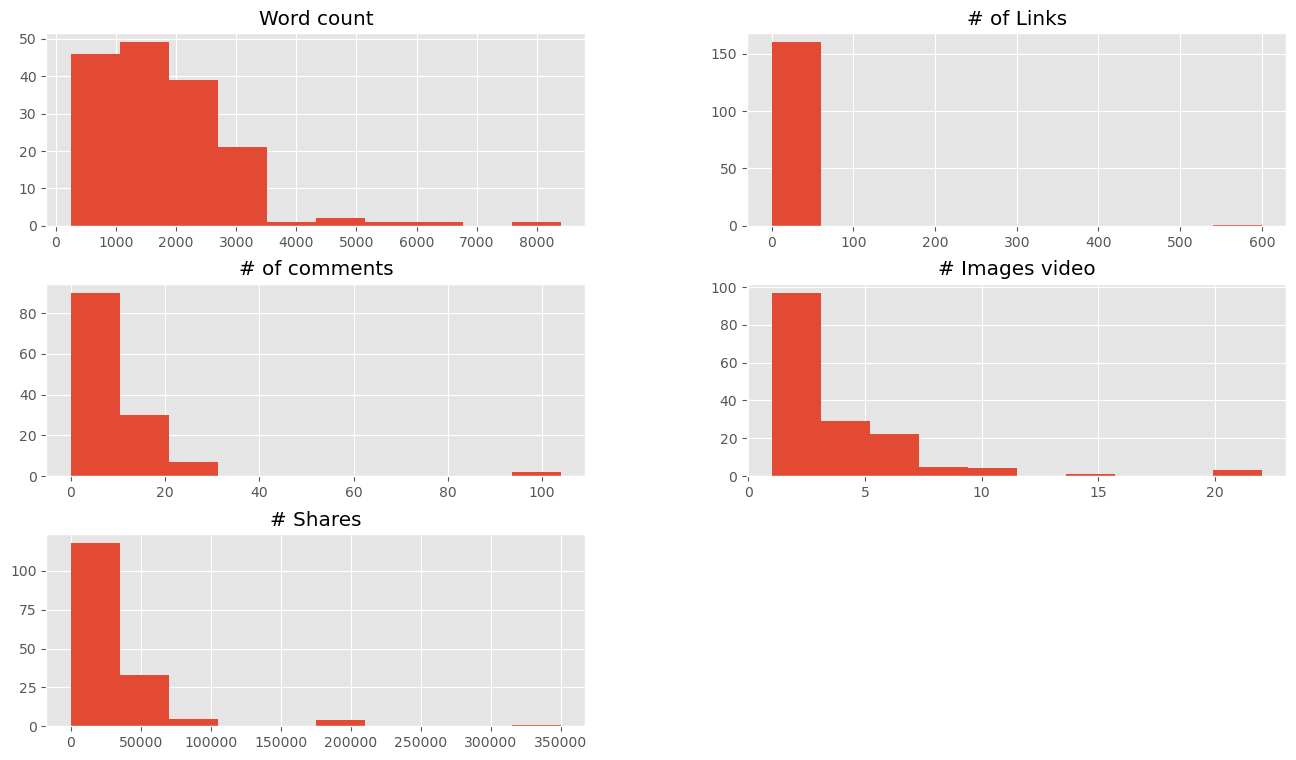

In [9]:
# Visualizamos rápidamente las características de entrada
# Eliminamos las columnas 'Title', 'url' y 'Elapsed days' del DataFrame 'data' (solo para esta visualización)
# axis=1 indica que estamos eliminando columnas (no filas)
# Luego, generamos automáticamente histogramas para todas las columnas numéricas restantes
data.drop(['Title', 'url', 'Elapsed days'], axis=1).hist()
plt.show()

Distribución de las variables numéricas

Estos histogramas muestran cómo se distribuyen las variables numéricas del dataset (como número de palabras, enlaces, comentarios, etc.). Permiten identificar valores frecuentes, asimetrías o posibles outliers. A diferencia de los gráficos de barras, estos representan variables continuas y no categoría
A continuación, vamos a filtrar los datos de la variable Cantidad de Palabras **(Word count)** para quedarnos con los registros que tengan menos de 3500 palabras, y también con los que tengan una Cantidad de Compartidos **# (Shares)** menor a 80.000.
Luego, vamos a ratificar este filtrado pintando en azul los puntos con menos de 1808 palabras (que es la media), y en naranja los que tengan ms..


### Visualizamos cantidad de Palabras vs. Compartidos

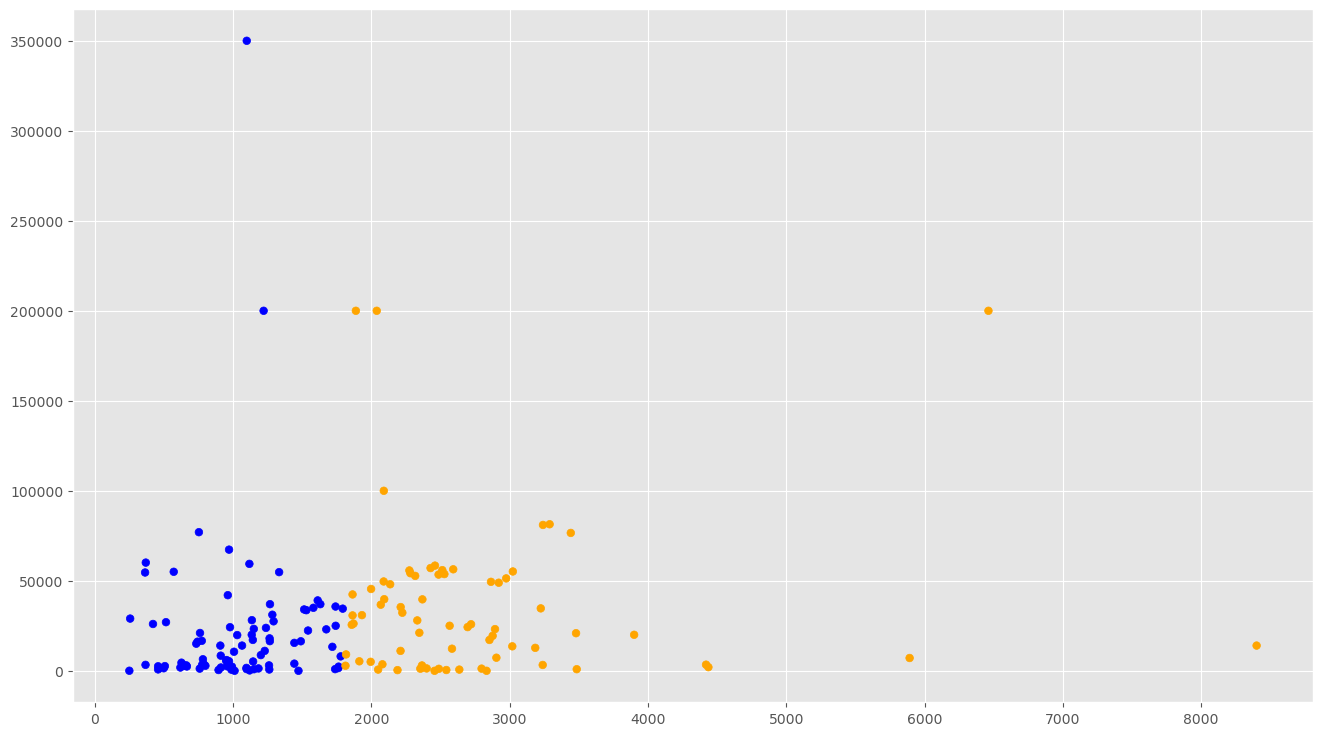

In [10]:
# Vamos a visualizar los datos de entrada los datos

colores = ['orange', 'blue']
tamanios = [30,60]

f1 = data['Word count'].values
f2 = data['# Shares'].values

# vamos a pintar en 2 colores los puntos por debajo de la media de Cantidad de Palabras

asignar = []
for index, row in data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else: 
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

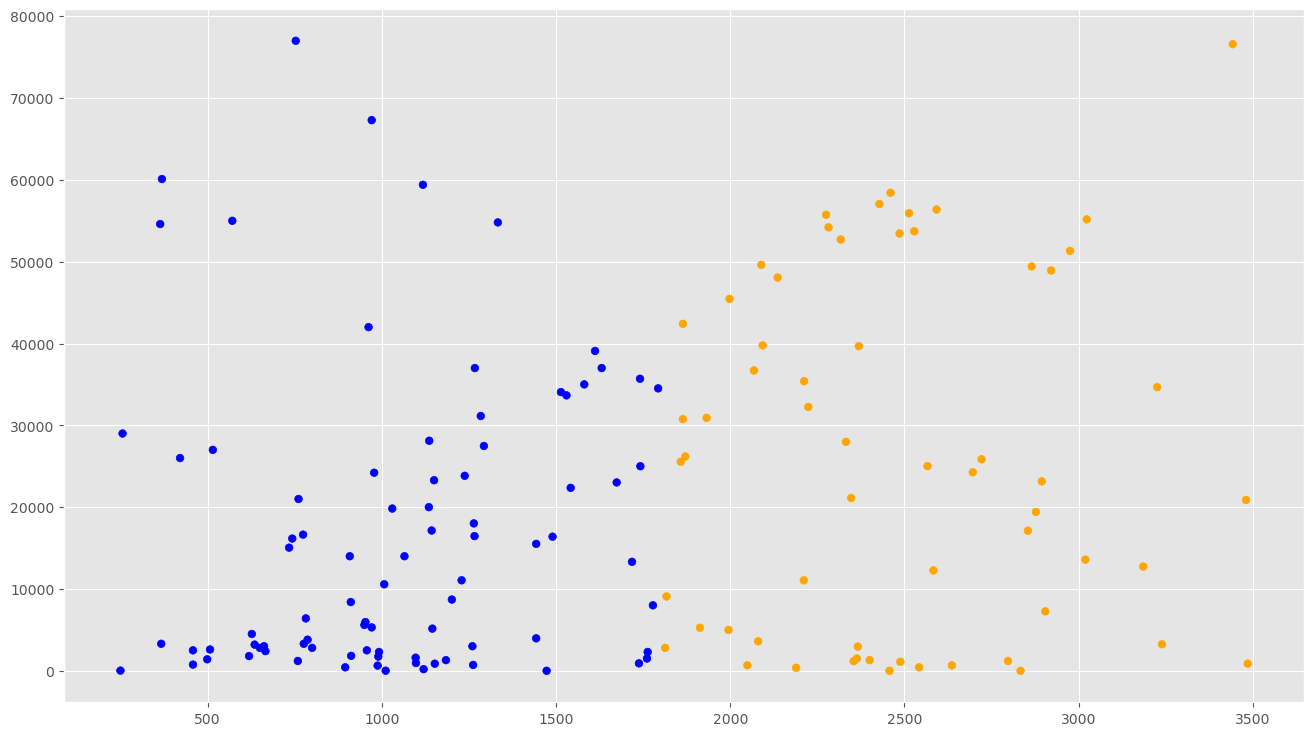

In [12]:
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# Esto es en el eje X: entre 0 y 3500 
# y en el eje Y: entre 0 y 80000

filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <=80000)]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [13]:
# Veamos cómo cambian los valores una vez filtrados
filtered_data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,148.000000,148.000000,121.000000,148.000000,148.000000,148.000000
mean,1640.209459,5.743243,7.256198,3.331081,91.554054,20545.648649
std,821.975365,6.064418,6.346297,2.706476,91.143923,19933.865031
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,971.000000,3.000000,2.000000,1.000000,28.750000,2750.000000
50%,1536.000000,5.000000,6.000000,3.000000,60.000000,15836.000000
75%,2335.750000,7.000000,11.000000,4.000000,110.500000,34177.500000
max,3485.000000,49.000000,30.000000,22.000000,349.000000,77000.000000


### Regresión Lineal Simple (1 variable)

In [14]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

In [15]:
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones, que en definitiva es una línea (en este caso , al ser 2D).
y_pred = regr.predict(X_train)

# Mostramos el coeficiente (pendiente) de la recta
print('Coefficients: ', regr.coef_)

# Mostramos el término independiente (intercepto), donde la recta corta el eje Y (cuando x=0)
print('Independent term: ', regr.intercept_)

# Calculamos el error cuadrático medio (MSE), mide qué tan lejos están las predicciones de los valores reales
print('Mean squeared error: %.2f' % mean_squared_error(y_train, y_pred))

# Puntaje de varianza (r2): mide qué porcentaje de la variación de Y es explicada por el modelo
# 1.0 sería un modelo perfecto
print('Variance score: %.2f: ' % r2_score(y_train, y_pred))

Coefficients:  [5.69765366]
Independent term:  11200.303223074163
Mean squeared error: 372888728.34
Variance score: 0.06: 


### Visualizamos la Recta que obtuvimos

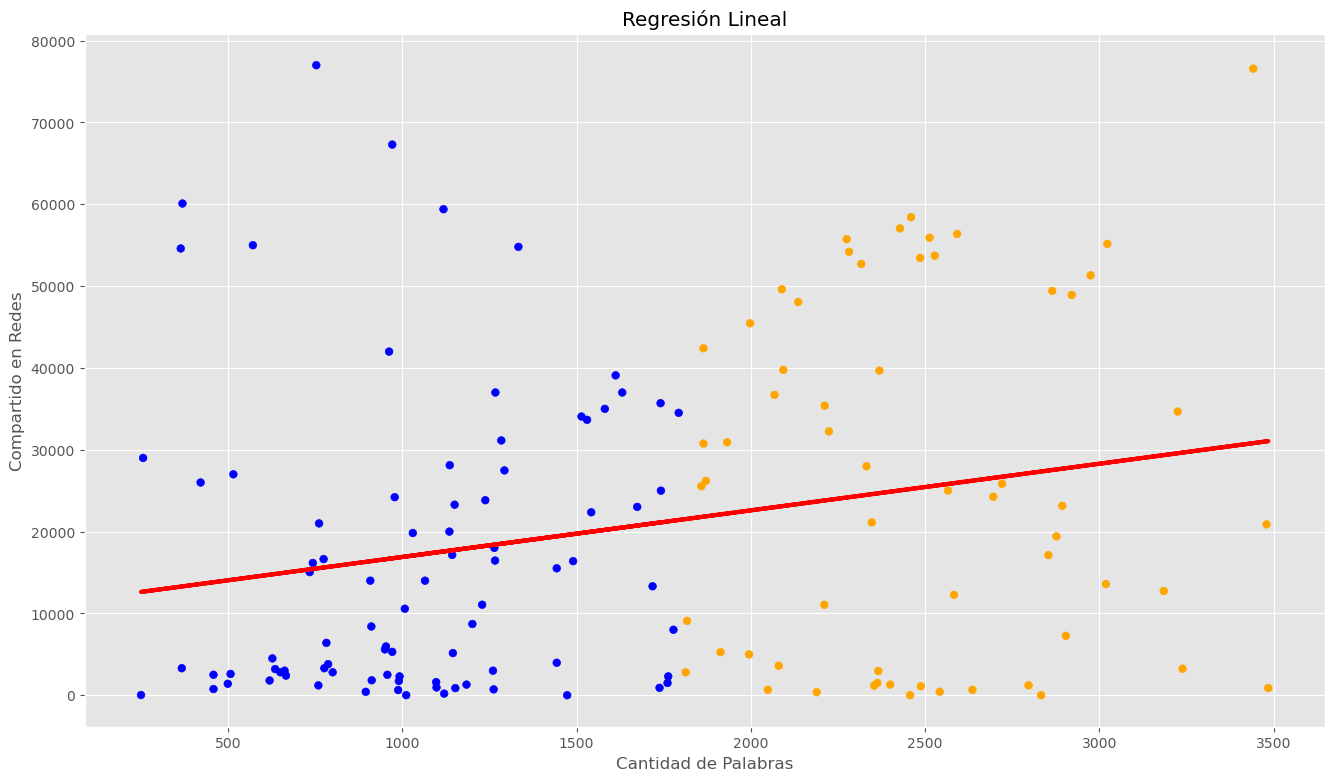

In [16]:
plt.scatter(X_train[:, 0], y_train, c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Palabras')
plt.ylabel('Compartido en Redes')
plt.title('Regresión Lineal')

plt.show()

### Predicción 1

In [40]:
# Vamos a comprobar
# Queremos predecir cuántos "Shares" se van a obtener por un artículo con 2.000 palabras
# Según nuestro modelo hacemos:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil[0]))          # Extraemos el valor escalar del array

22595


Predicción de cuántos "Shares" tendría un artículo con 2000 palabras.
El resultado fue 22.595, pero el modelo no es confiable:
está basado solo en una variable (cantidad de palabras) y tiene bajo rendimiento (R² bajo).
Por eso la predicción puede estar alejada de la realidad.

### Regresión Lineal Múltiple 
(o Regregión con múltiples variables)

In [23]:
filtered_data.columns

Index(['Title', 'url', 'Word count', '# of Links', '# of comments',
       '# Images video', 'Elapsed days', '# Shares'],
      dtype='object')

In [26]:
# Vamos a intentar mejorar el Modelo, con una dimensión más:
# Para poder graficar en 3D, haremos una variable nueva que será la suma de los enlaces, comentarios e imágenes

suma = (filtered_data['# of Links'] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])
# fillna(0) asegura que los valores faltantes se traten como '0'.
dataX2 = pd.DataFrame() 
dataX2['Word count'] = filtered_data['Word count']
dataX2['suma'] = suma
XY_train = np.array(dataX2) # Convierte dataX2 a un arreglo NumPy llamado XY_train que se usará como variables independientes (features)
z_train = filtered_data['# Shares'].values # se le asigna a z_train (variable objetivo o target) los valores que se encuentran en # Shares 
                                            # al aplicar .values se extraen únicamente los números de esa columna y los conviente en un array de NumPy


In [27]:
# Creamos un nuevo objeto de Regresión Lineal 
regr2 = linear_model.LinearRegression()

# Entrenamos el modelo, esta vez con 2 dimensiones 
# Obtendremos dos coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

# Mostramos el coeficiente (pendiente) de la recta
print('Coefficients: ', regr2.coef_)

# Mostramos el término independiente (intercepto), donde la recta corta el eje Y (cuando x=0)
print('Independent term: ', regr2.intercept_)

# Calculamos el error cuadrático medio (MSE), mide qué tan lejos están las predicciones de los valores reales
print('Mean squeared error: %.2f' % mean_squared_error(z_train, z_pred))

# Puntaje de varianza (r2): mide qué porcentaje de la variación de Y es explicada por el modelo
# 1.0 sería un modelo perfecto
print('Variance score: %.2f: ' % r2_score(z_train, z_pred))

Coefficients:  [   6.63216324 -483.40753769]
Independent term:  16921.891098343367
Mean squeared error: 352122816.48
Variance score: 0.11: 


Ahora obtenemos 2 coeficientes, uno por cada variable predictiva, representando un plano en 3D. El error (MSE) sigue siendo alto, aunque ligeramente mejor. El puntaje de varianza (r2) casi se duplica, pero sigue siendo muy bajo, lejos de un modelo ideal (1).

### Visualizar un Plano en 3D

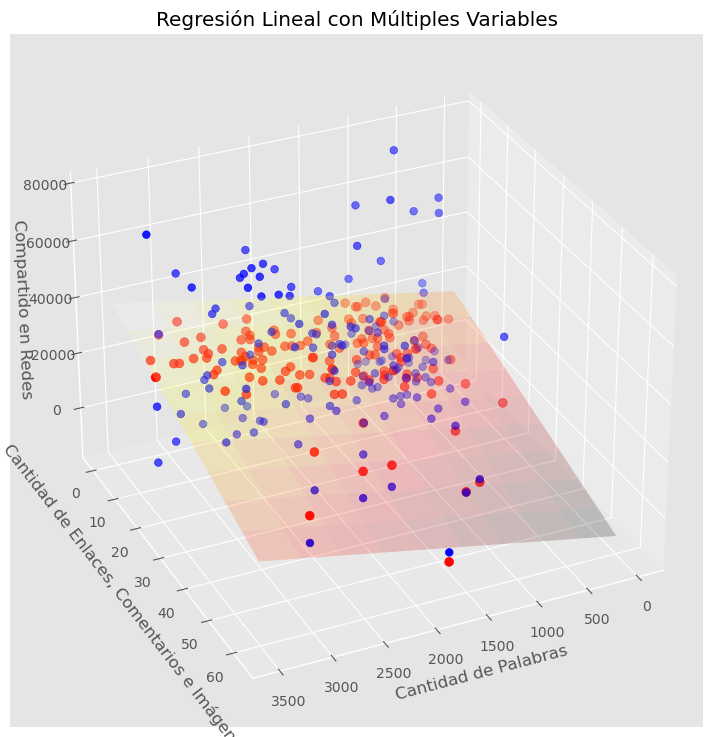

In [33]:
fig = plt.figure()
#ax = Axes3D(fig) # caducó
ax = fig.add_subplot(111, projection='3d') # Crea los ejes 3D correctamente

# Creamos una malla sobre la cual graficamos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num= 10), np.linspace(0, 60, num=10))

# Calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy)

# Calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)

# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')
            
# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:,0], XY_train[:,1], z_train, c='blue', s=30)

# Graficamos en rojo los puntos predichos
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)

# Con esto situamos la "cámara" con la que visualizamos 
ax.view_init(elev=30, azim=65)

ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces, Comentarios e Imágenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')

plt.show()

### Predicción 2

In [36]:
# Si quiero predecir cuántos "Shares" voy a obtener por un artículo con:
# 2000 palabras y con enlaces: 10, comentarios:4, imágenes 6
# según nuestro modelos hacemos:

z_Dosmil = regr2.predict([[2000, 10 + 4 + 6]])
print(int(z_Dosmil[0]))

20518


### Comparemos las predicciónes obtenidas en los modelos
En este caso, Obtuvimos mejora en el modelo de 2 dimensione
Si restas MSE_ModeloA - MSE_ModeloB (100 - 80 = 20), un resultado positivo significa que el Modelo A tenía un error mayor, y por lo tanto, el Modelo B (el segundo) representa una mejora. Un valor positivo grande indica una mejora significativa.s

In [37]:
# Restamos los errores calculados antes:
# Obviamente, "menos error" es mejor
mejoraEnError = mean_squared_error(y_train, y_pred) - mean_squared_error(z_train, z_pred)
print(mejoraEnError)

20765911.860715985


Como el resultado es 20765911.86, un número positivo muy grande, significa que el MSE del primer modelo era mucho más alto que el del segundo. Es decir, el segundo modelo tiene un error significativamente menor, lo cual es una mejora.

In [38]:
# También calculamos la mejora en la varianza:
mejoraEnVarianza = r2_score(z_train, z_pred) - r2_score(y_train, y_pred)
print(mejoraEnVarianza)
# Aunque no parezca mucho, recordemos que el valor más alto que se puede obtener es 1.0

0.052615337462582956


Como el resultado es 0.0526, un número positivo, significa que el R2 del segundo modelo es mayor que el del primero. Es decir, el segundo modelo explica más varianza, lo cual es una mejora.

In [42]:
# Finalmente, mejoramos en nuestra predicción de un artículo de 2.000 palabras, 
# pues aunque disminuyen los "Shares" que obtendremos en el 2do modelo, 
# seguramente será un valor más cercano a la realidad
diferenciaComparir = z_Dosmil[0] - y_Dosmil[0]
print(int(diferenciaComparir))

-2077


El resultado -2077 significa que el segundo modelo predice 2077 "Shares" menos que el primer modelo para ese artículo. El comentario en el código sugiere que esta predicción más baja se considera "más cercana a la realidad" que la predicción posiblemente inflada del primer modelo.